### This notebook estimates the fraction of positives in GBS.
This fraction can then be used as lower and upper bound to assessing binary classifiers in the absence of negative samples (see: *positive-unlabeled learning*).

Currently used: One-Class SVMs with PCA (n=5) on Big Five.

results show that **fraction > 0.7** with high confidence

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA

df = pd.concat([pd.read_csv('X_red.csv'),
                pd.read_csv('y_red.csv')], axis=1, join='inner')

df = df[['Zurueckhaltend','leicht Vertrauen','Faulheit','Entspannt','wenig kuenstlerisches Interesse','Gesellig',
                    'Andere kritisieren','Gruendlich','Nervoes','Phantasievoll']].copy()

pca = PCA(n_components=5)
X_r = pd.DataFrame(pca.fit(df.tail(4888).copy()).transform(df))
print('explained variance ratio (5 components): %s'
      % str(pca.explained_variance_ratio_))

GBS = X_r.head(578).copy()
GESIS = X_r.tail(4888).copy()

X_r.head(5)

explained variance ratio (5 components): [0.20685277 0.14679858 0.12221753 0.11419584 0.10359452]


,0,1,2,3,4
0,-0.532302,-0.478296,0.424518,-0.024958,0.027920
1,-0.525936,-0.302242,-0.216194,-0.189263,-0.049161
2,0.497572,-0.003374,-0.159925,0.342149,0.156740
3,0.287903,0.278965,-0.360193,0.127750,0.166871
4,-0.593756,-0.079978,-0.128161,0.257923,0.373466


In [336]:
def count_1(ones):
    return sum([1 for i in ones if i==1])

gesis_frame = pd.DataFrame()
gbs_frame = pd.DataFrame()

ran = [0.101**x for x in range(1,15)]

for i in ran:
    plot_gesis = []
    plot_gbs = []
    for j in range(10):
        
        #Repeated Hold-Out Validation
        tmp = GESIS.reindex(np.random.permutation(GESIS.index))
        GESIS_train = tmp.head(4310).copy()
        GESIS_test = tmp.tail(578).copy()
        del tmp

        clf = svm.OneClassSVM(kernel='linear', nu=i, shrinking=True)
        clf.fit(GESIS_train)

        pGESIS = clf.predict(GESIS_test)
        pGBS = clf.predict(GBS)
        
        plot_gesis.append(count_1(pGESIS))
        plot_gbs.append(count_1(pGBS))
    
    gesis_frame[i] = plot_gesis
    gbs_frame[i] = plot_gbs 
    
gesis_frame.head(5)

,0.101,0.010201000000000002,0.0010303010000000002,0.00010406040100000003,1.0510100501000003e-05,1.0615201506010003e-06,1.0721353521070105e-07,1.0828567056280806e-08,1.0936852726843616e-09,1.1046221254112052e-10,1.1156683466653173e-11,1.1268250301319706e-12,1.1380932804332903e-13,1.1494742132376234e-14
0,422,375,380,435,522,177,23,21,221,230,23,26,236,14
1,146,361,249,354,509,161,19,61,210,0,4,6,243,0
2,245,479,428,100,233,239,117,258,0,20,0,78,3,0
3,504,399,382,185,413,185,2,0,8,3,33,223,14,2
4,434,359,352,383,499,203,38,0,3,3,53,61,215,8


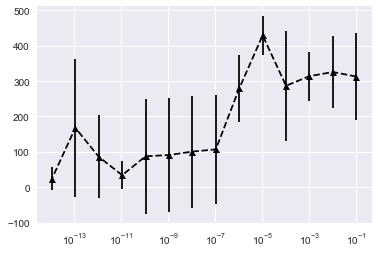

In [339]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')

plt.errorbar(ran, gbs_frame.mean(), gbs_frame.std(), linestyle='--', marker='^', color='black')
plt.savefig('gbs_occ')

plt.show()

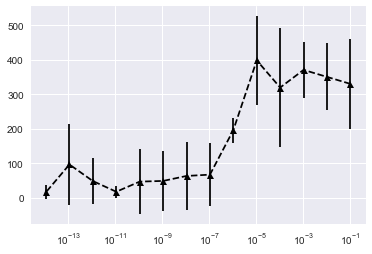

In [340]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')

plt.errorbar(ran, gesis_frame.mean(), gesis_frame.std(), linestyle='--', marker='^', color='black')
plt.savefig('gesis_occ')
plt.show()

In [324]:
#best = 0.9**11
#lowerBound = 410/578
print(420/578)

0.7093425605536332
